In [2]:
import pandas as pd
from pandas import Interval
import os
import datetime as dt
#from sampler import Sampler, strategies
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Evaluation of strategies by representation of all areas
<p>The accurate representation of all traveltimes can be evaluated on all packets and is not restricted to SARS-CoV-RNA-containing packets. </br>
Due to the uniformity of the scenarios in that regard, few sample scenarios suffice</p>

In [3]:
path = os.path.join("result_files", "s1_variation_0905_packets_LZ4.parquet")
dfpackets = pd.read_parquet(path)
path = os.path.join("result_files", "s1_variation_0905_routetable_LZ4.parquet")
dfrt = pd.read_parquet(path)["MH4376405120"]
dfpackets = dfpackets.set_index("pid")
dfpackets["arrivaltime"] = pd.to_datetime(dfrt)
dfpackets["traveltime"] = dfpackets["arrivaltime"] - dfpackets["origin_time"]
dfpackets["travelhours"] = (dfpackets["traveltime"].dt.total_seconds()/3600).round(2)
dfpackets.head()

,origin_location,classification,origin_time,contents,arrivaltime,traveltime,travelhours
pid,,,,,,,
P0,MH4469504790,Healthy,2020-08-17 10:01:40,"b'[""Fecal-Matter"", ""Pepper-virus""]'",2020-08-17 10:18:19,0 days 00:16:39,0.28
P1,MH4469504790,Healthy,2020-08-17 18:43:00,"b'[""Fecal-Matter"", ""Pepper-virus""]'",2020-08-17 18:58:59,0 days 00:15:59,0.27
P2,MH4469504790,Healthy,2020-08-17 10:57:50,"b'[""Fecal-Matter"", ""Pepper-virus""]'",2020-08-17 11:14:25,0 days 00:16:35,0.28
P3,MH4469504790,Healthy,2020-08-17 12:39:10,"b'[""Fecal-Matter"", ""Pepper-virus""]'",2020-08-17 12:55:43,0 days 00:16:33,0.28
P4,MH4469504790,Healthy,2020-08-17 07:11:30,"b'[""Fecal-Matter"", ""Pepper-virus""]'",2020-08-17 07:28:57,0 days 00:17:27,0.29


number of bins: 8


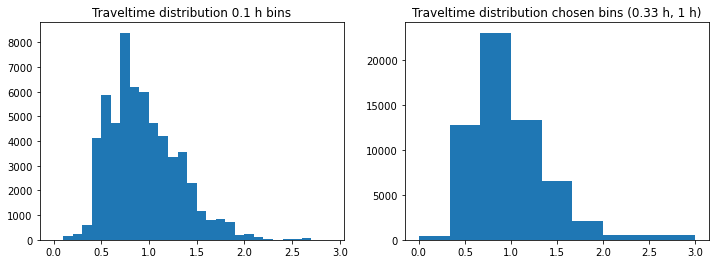

In [12]:
bins = np.concatenate([np.arange(0,2,1/3),np.arange(2,4,1)])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12,4])

ax[0].hist(dfpackets["travelhours"], bins=np.arange(0,3,0.1))
ax[0].set(title="Traveltime distribution 0.1 h bins")
ax[1].hist(dfpackets["travelhours"], bins=bins)
ax[1].set(title="Traveltime distribution chosen bins (0.33 h, 1 h)")
print(f"number of bins: {len(bins)}")

## Split timeseries into 8 timeseries according to bins

In [13]:
path = os.path.join("result_files", "tss1_variation_0905_Cov-RNA_vals_LZ4.parquet")
dftimeseries = pd.read_parquet(path)
dftimeseries.set_index("index", inplace=True)
dfpackets["bin"] = pd.cut(dfpackets["travelhours"], bins)
dfpackets.head(5)

,origin_location,classification,origin_time,contents,arrivaltime,traveltime,travelhours,bin
pid,,,,,,,,
P0,MH4469504790,Healthy,2020-08-17 10:01:40,"[Fecal-Matter, Pepper-virus]",2020-08-17 10:18:19,0 days 00:16:39,0.28,"(0.0, 0.333]"
P1,MH4469504790,Healthy,2020-08-17 18:43:00,"[Fecal-Matter, Pepper-virus]",2020-08-17 18:58:59,0 days 00:15:59,0.27,"(0.0, 0.333]"
P2,MH4469504790,Healthy,2020-08-17 10:57:50,"[Fecal-Matter, Pepper-virus]",2020-08-17 11:14:25,0 days 00:16:35,0.28,"(0.0, 0.333]"
P3,MH4469504790,Healthy,2020-08-17 12:39:10,"[Fecal-Matter, Pepper-virus]",2020-08-17 12:55:43,0 days 00:16:33,0.28,"(0.0, 0.333]"
P4,MH4469504790,Healthy,2020-08-17 07:11:30,"[Fecal-Matter, Pepper-virus]",2020-08-17 07:28:57,0 days 00:17:27,0.29,"(0.0, 0.333]"


## Import timeseries files
1. read file
2. set index
3. set multiindex

In [14]:
dfbins = pd.read_csv(r"result_files\ts4_ts_by_bins.csv")
nan = np.nan
dfbins.set_index("index", inplace=True)
dfbins.columns = pd.MultiIndex.from_tuples([eval(c) for c in dfbins.columns])
dfbins.head()

0                                           \
                    (0.0, 0.333] (0.333, 0.667] (0.667, 1.0] (1.0, 1.333]   
index                                                                       
2020-08-17 00:00:00     0.020985       0.029789     0.101472     0.123034   
2020-08-17 00:00:10     0.041816       0.040104     0.089804     0.118953   
2020-08-17 00:00:20     0.021173       0.045270     0.074846     0.114769   
2020-08-17 00:00:30     0.000530       0.040067     0.059784     0.113907   
2020-08-17 00:00:40     0.000509       0.034868     0.056443     0.108432   

                                                                           1  \
                    (1.667, 2.0] (2.0, 3.0]  NaN (1.333, 1.667] (0.0, 0.333]   
index                                                                          
2020-08-17 00:00:00     0.005701   0.000157  0.0       0.041204     0.000324   
2020-08-17 00:00:10     0.007394   0.000155  0.0       0.037234     0.000313   
2020-08-17 00:00:20     0.009086   0.000152  0.0       0.033246     0.000302   
2020-08-17 00:00:30     0.010779   0.000150  0.0       0.029258     0.000292   
2020-08-17 00:00:40     0.012472   0.000148  0.0       0.025271     0.000281   

                                    ...    8                           9  \
                    (0.333, 0.667]  ...  NaN (1.333, 1.667] (0.0, 0.333]   
index                               ...                                    
2020-08-17 00:00:00       0.076912  ...  0.0       0.050364     0.000149   
2020-08-17 00:00:10       0.066723  ...  0.0       0.045139     0.000144   
2020-08-17 00:00:20       0.061638  ...  0.0       0.039913     0.000139   
2020-08-17 00:00:30       0.046180  ...  0.0       0.037009     0.000134   
2020-08-17 00:00:40       0.041047  ...  0.0       0.034105     0.000130   

                                                                           \
                    (0.333, 0.667] (0.667, 1.0] (1.0, 1.333] (1.667, 2.0]   
index                                                                       
2020-08-17 00:00:00       0.092210     0.042412     0.035469     0.014355   
2020-08-17 00:00:10       0.080940     0.042401     0.044418     0.014377   
2020-08-17 00:00:20       0.074774     0.048926     0.056711     0.014400   
2020-08-17 00:00:30       0.065712     0.048816     0.062367     0.014423   
2020-08-17 00:00:40       0.051381     0.055391     0.068057     0.014446   

                                                    
                    (2.0, 3.0]  NaN (1.333, 1.667]  
index                                               
2020-08-17 00:00:00   0.000467  0.0       0.011974  
2020-08-17 00:00:10   0.000461  0.0       0.014247  
2020-08-17 00:00:20   0.000455  0.0       0.016522  
2020-08-17 00:00:30   0.000449  0.0       0.014187  
2020-08-17 00:00:40   0.000443  0.0       0.011852  

[5 rows x 80 columns]

# Vorbereitung der Konzentrationszeitreihen - Umwandlung in Frachtzeitreihen
1. Import Abflussmengen
2. Multiplikation mit Konzentrationen

In [15]:
# 1.....................................................
flows = pd.read_csv(r"result_files\com2a_hydraulic.csv")
dtindex = dfbins.index
flows["time"] = dtindex
flows = flows.set_index("time")["flow-rate [l/s]"]

# 2.....................................................
dfloads = dfbins.mul(flows.values, axis=0)
dfloads.head()

0                                           \
                    (0.0, 0.333] (0.333, 0.667] (0.667, 1.0] (1.0, 1.333]   
index                                                                       
2020-08-17 00:00:00     3.392310       4.815550    16.403717    19.889323   
2020-08-17 00:00:10     6.759875       6.483057    14.517433    19.229586   
2020-08-17 00:00:20     3.422739       7.318199    12.099423    18.553324   
2020-08-17 00:00:30     0.085604       6.477044     9.664536    18.413829   
2020-08-17 00:00:40     0.082297       5.636744     9.124404    17.528878   

                                                                           1  \
                    (1.667, 2.0] (2.0, 3.0]  NaN (1.333, 1.667] (0.0, 0.333]   
index                                                                          
2020-08-17 00:00:00     0.921598   0.025345  0.0       6.660910     0.052379   
2020-08-17 00:00:10     1.195228   0.024992  0.0       6.019123     0.050633   
2020-08-17 00:00:20     1.468859   0.024639  0.0       5.374476     0.048887   
2020-08-17 00:00:30     1.742489   0.024286  0.0       4.729829     0.047141   
2020-08-17 00:00:40     2.016120   0.023934  0.0       4.085182     0.045395   

                                    ...    8                           9  \
                    (0.333, 0.667]  ...  NaN (1.333, 1.667] (0.0, 0.333]   
index                               ...                                    
2020-08-17 00:00:00      12.433410  ...  0.0       8.141684     0.024055   
2020-08-17 00:00:10      10.786337  ...  0.0       7.296987     0.023279   
2020-08-17 00:00:20       9.964230  ...  0.0       6.452289     0.022503   
2020-08-17 00:00:30       7.465397  ...  0.0       5.982798     0.021728   
2020-08-17 00:00:40       6.635468  ...  0.0       5.513307     0.020952   

                                                                           \
                    (0.333, 0.667] (0.667, 1.0] (1.0, 1.333] (1.667, 2.0]   
index                                                                       
2020-08-17 00:00:00      14.906369     6.856210     5.733878     2.320657   
2020-08-17 00:00:10      13.084608     6.854504     7.180521     2.324213   
2020-08-17 00:00:20      12.087814     7.909297     9.167666     2.327903   
2020-08-17 00:00:30      10.622889     7.891527    10.082078     2.331594   
2020-08-17 00:00:40       8.306083     8.954352    11.001881     2.335285   

                                                    
                    (2.0, 3.0]  NaN (1.333, 1.667]  
index                                               
2020-08-17 00:00:00   0.075414  0.0       1.935627  
2020-08-17 00:00:10   0.074482  0.0       2.303052  
2020-08-17 00:00:20   0.073551  0.0       2.670849  
2020-08-17 00:00:30   0.072619  0.0       2.293434  
2020-08-17 00:00:40   0.071688  0.0       1.916020  

[5 rows x 80 columns]

## Auswertung der ganzen 9 Zeitreihen ("tatsächliche Fracht"): Welche Fracht pro bin?
1. Bilden der Summen
2. Bilden der Mittelwerte (und Bereiche)
3. Plot von Gesamtfracht und Anteiliger Fracht

                         mean          std
(0.0, 0.333]     12423.987900    79.622882
(0.333, 0.667]  287195.297014   566.624897
(0.667, 1.0]    474405.118150  1101.818344
(1.0, 1.333]    247419.562957  1194.488360
(1.333, 1.667]  118067.712703   470.246878
(1.667, 2.0]     39022.337997   465.866310
(2.0, 3.0]        8951.783676   247.877324


[Text(0, 0.5, 'fraction of total load [-]'), Text(0.5, 0, 'bin [h]')]

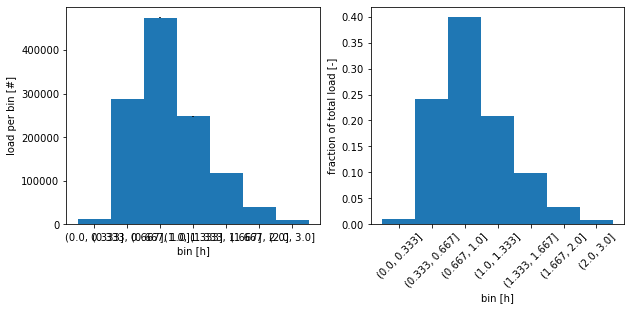

In [16]:
#1..+..2...................................................................
dfsummary = dfloads.sum().unstack().apply(("mean","std"))
dfsummary = dfsummary.loc[:,dfsummary.columns[1:]].T
print(dfsummary)
dfsummary["fractions"] = dfsummary["mean"].div(dfsummary["mean"].sum())

#3.........................................................................
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[10,4])
plt.xticks(rotation=45)
bins = dfsummary.index
binstrings = [str(b) for b in bins]
ax[0].bar(x=binstrings, height=dfsummary["mean"], yerr=dfsummary["std"], width=1)
ax[0].set(ylabel="load per bin [#]", xlabel="bin [h]")
ax[1].bar(x=binstrings, height=dfsummary["fractions"], width=1)
ax[1].set(ylabel="fraction of total load [-]", xlabel="bin [h]")
#plt.xticks(rotation=45)

# Auswertung der Beprobten Reihen und Vergleich mit Gesamtfracht
1. Sampler einrichten
2. Vorbereiten Strategien B, D, F

In [28]:
dtindex = pd.to_datetime(dfbins.index)
today = dt.datetime.today()
y, m, d = today.year, today.month, today.day
dtindex = dtindex.map(lambda t: t.replace(year=y, month=m, day=d))

# 1....................................
flows.index = pd.to_datetime(dtindex)
sampler = Sampler()
sampler.add_flows(flows)

[Text(0, 0.5, 'fraction of total load [-]'), Text(0.5, 0, 'bin [h]')]

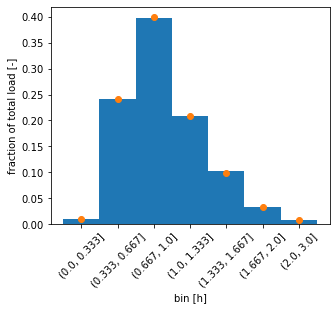

In [29]:
# 2....................................
used_strategies = ["B","D","F"]

dfbins.index = dtindex
samples_b = sampler.sample(dfbins, strategy=strategies.get("F")).unstack()
samples_b = samples_b[samples_b.columns[1:]]
samples_b.columns = [str(c) for c in samples_b.columns]
fractions_b = samples_b.div(samples_b.sum(axis=1), axis="index")
summary_b = fractions_b.apply(("mean","std")).T

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[5,4])
plt.xticks(rotation=45)
ax.bar(x=binstrings, height=summary_b["mean"], width=1)
ax.scatter(binstrings, dfsummary["fractions"])
ax.set(ylabel="fraction of total load [-]", xlabel="bin [h]")

In [30]:
dfsummary.index = binstrings
summary_b.join(dfsummary["fractions"])

,mean,std,fractions
"(0.0, 0.333]",0.010665,0.001240,0.010462
"(0.333, 0.667]",0.240718,0.006755,0.241852
"(0.667, 1.0]",0.397260,0.003796,0.399504
"(1.0, 1.333]",0.208917,0.005760,0.208356
"(1.333, 1.667]",0.102038,0.003733,0.099427
"(1.667, 2.0]",0.032896,0.002917,0.032861
"(2.0, 3.0]",0.007505,0.001358,0.007538


In [42]:
import pandas as pd
import numpy as np
import time
import datetime as dt

ns = ["x","y","z"]

def timestwo(subd):
    subd.update({k: v for k,v in zip(ns, np.random.random(3))})
    
d = {"a":{"aa":1,"ab":2},"b":{"bb":3,"bc":4}}
for key in d.keys():
    timestwo(d.get(key))
    print(d.get(key))

{'aa': 1, 'ab': 2, 'x': 0.6476720502103818, 'y': 0.7560416095261566, 'z': 0.5771434753503651}
{'bb': 3, 'bc': 4, 'x': 0.46930421271722755, 'y': 0.18808921783674515, 'z': 0.3379147037934106}


In [53]:
isinstance(pd.date_range(dt.datetime.today().date(), periods=24*60*6, freq="10S")[0], pd.Timestamp)

True

In [64]:
pd.date_range(dt.date.today(), dt.date.today() + dt.timedelta(days=1), periods=24+1, inclusive="left")

DatetimeIndex(['2022-02-25 00:00:00', '2022-02-25 01:00:00',
               '2022-02-25 02:00:00', '2022-02-25 03:00:00',
               '2022-02-25 04:00:00', '2022-02-25 05:00:00',
               '2022-02-25 06:00:00', '2022-02-25 07:00:00',
               '2022-02-25 08:00:00', '2022-02-25 09:00:00',
               '2022-02-25 10:00:00', '2022-02-25 11:00:00',
               '2022-02-25 12:00:00', '2022-02-25 13:00:00',
               '2022-02-25 14:00:00', '2022-02-25 15:00:00',
               '2022-02-25 16:00:00', '2022-02-25 17:00:00',
               '2022-02-25 18:00:00', '2022-02-25 19:00:00',
               '2022-02-25 20:00:00', '2022-02-25 21:00:00',
               '2022-02-25 22:00:00', '2022-02-25 23:00:00'],
              dtype='datetime64[ns]', freq=None)

In [86]:
pattern = [1.4, 0.3, 0.1, 0.0, 0.3, 1.7, 9.1, 21, 13, 9, 6.9, 4.9, 1.9, 3.6, 2.5, 2, 2.9, 2.3, 4.1, 4.0, 2.7,
                   2.1, 2.2, 2.0]
timerange = pd.date_range(dt.datetime.today().date(), periods=24*60*6, freq="10S")
timeindex = pd.date_range(dt.date.today(), dt.date.today() + dt.timedelta(days=1), periods=len(pattern)+1, inclusive="left")
timeweights = pd.Series(pattern, index=timeindex)
timeweights = timeweights.reindex(timerange)
#timeweights
timeweights[timeweights.index[-1]] = timeweights[timeweights.index[0]]
timeweights.interpolate(inplace=True)
timeweights.values

array([1.4       , 1.39694444, 1.39388889, ..., 1.40334262, 1.40167131,
       1.4       ])

In [104]:
from collections import Counter
import random
population = [("a",10),("b",12),("c",17)]
people = []
for node in population:
    people += node[0] * node[1]
random.shuffle(people)
for i,p in enumerate(people[10:14]):
    print(i)

0
1
2
3


In [114]:
ls = [i for i in range(10)]
ls2 = ls[2:7]
d, r = 4//5, 4%5
ls2 * d + ls2[:r]
#ls * 1.2

[2, 3, 4, 5]